# Word Sense Disambiguation
#### Team: Katherine Schlosser, Jiayao Wang, Linying Zhang

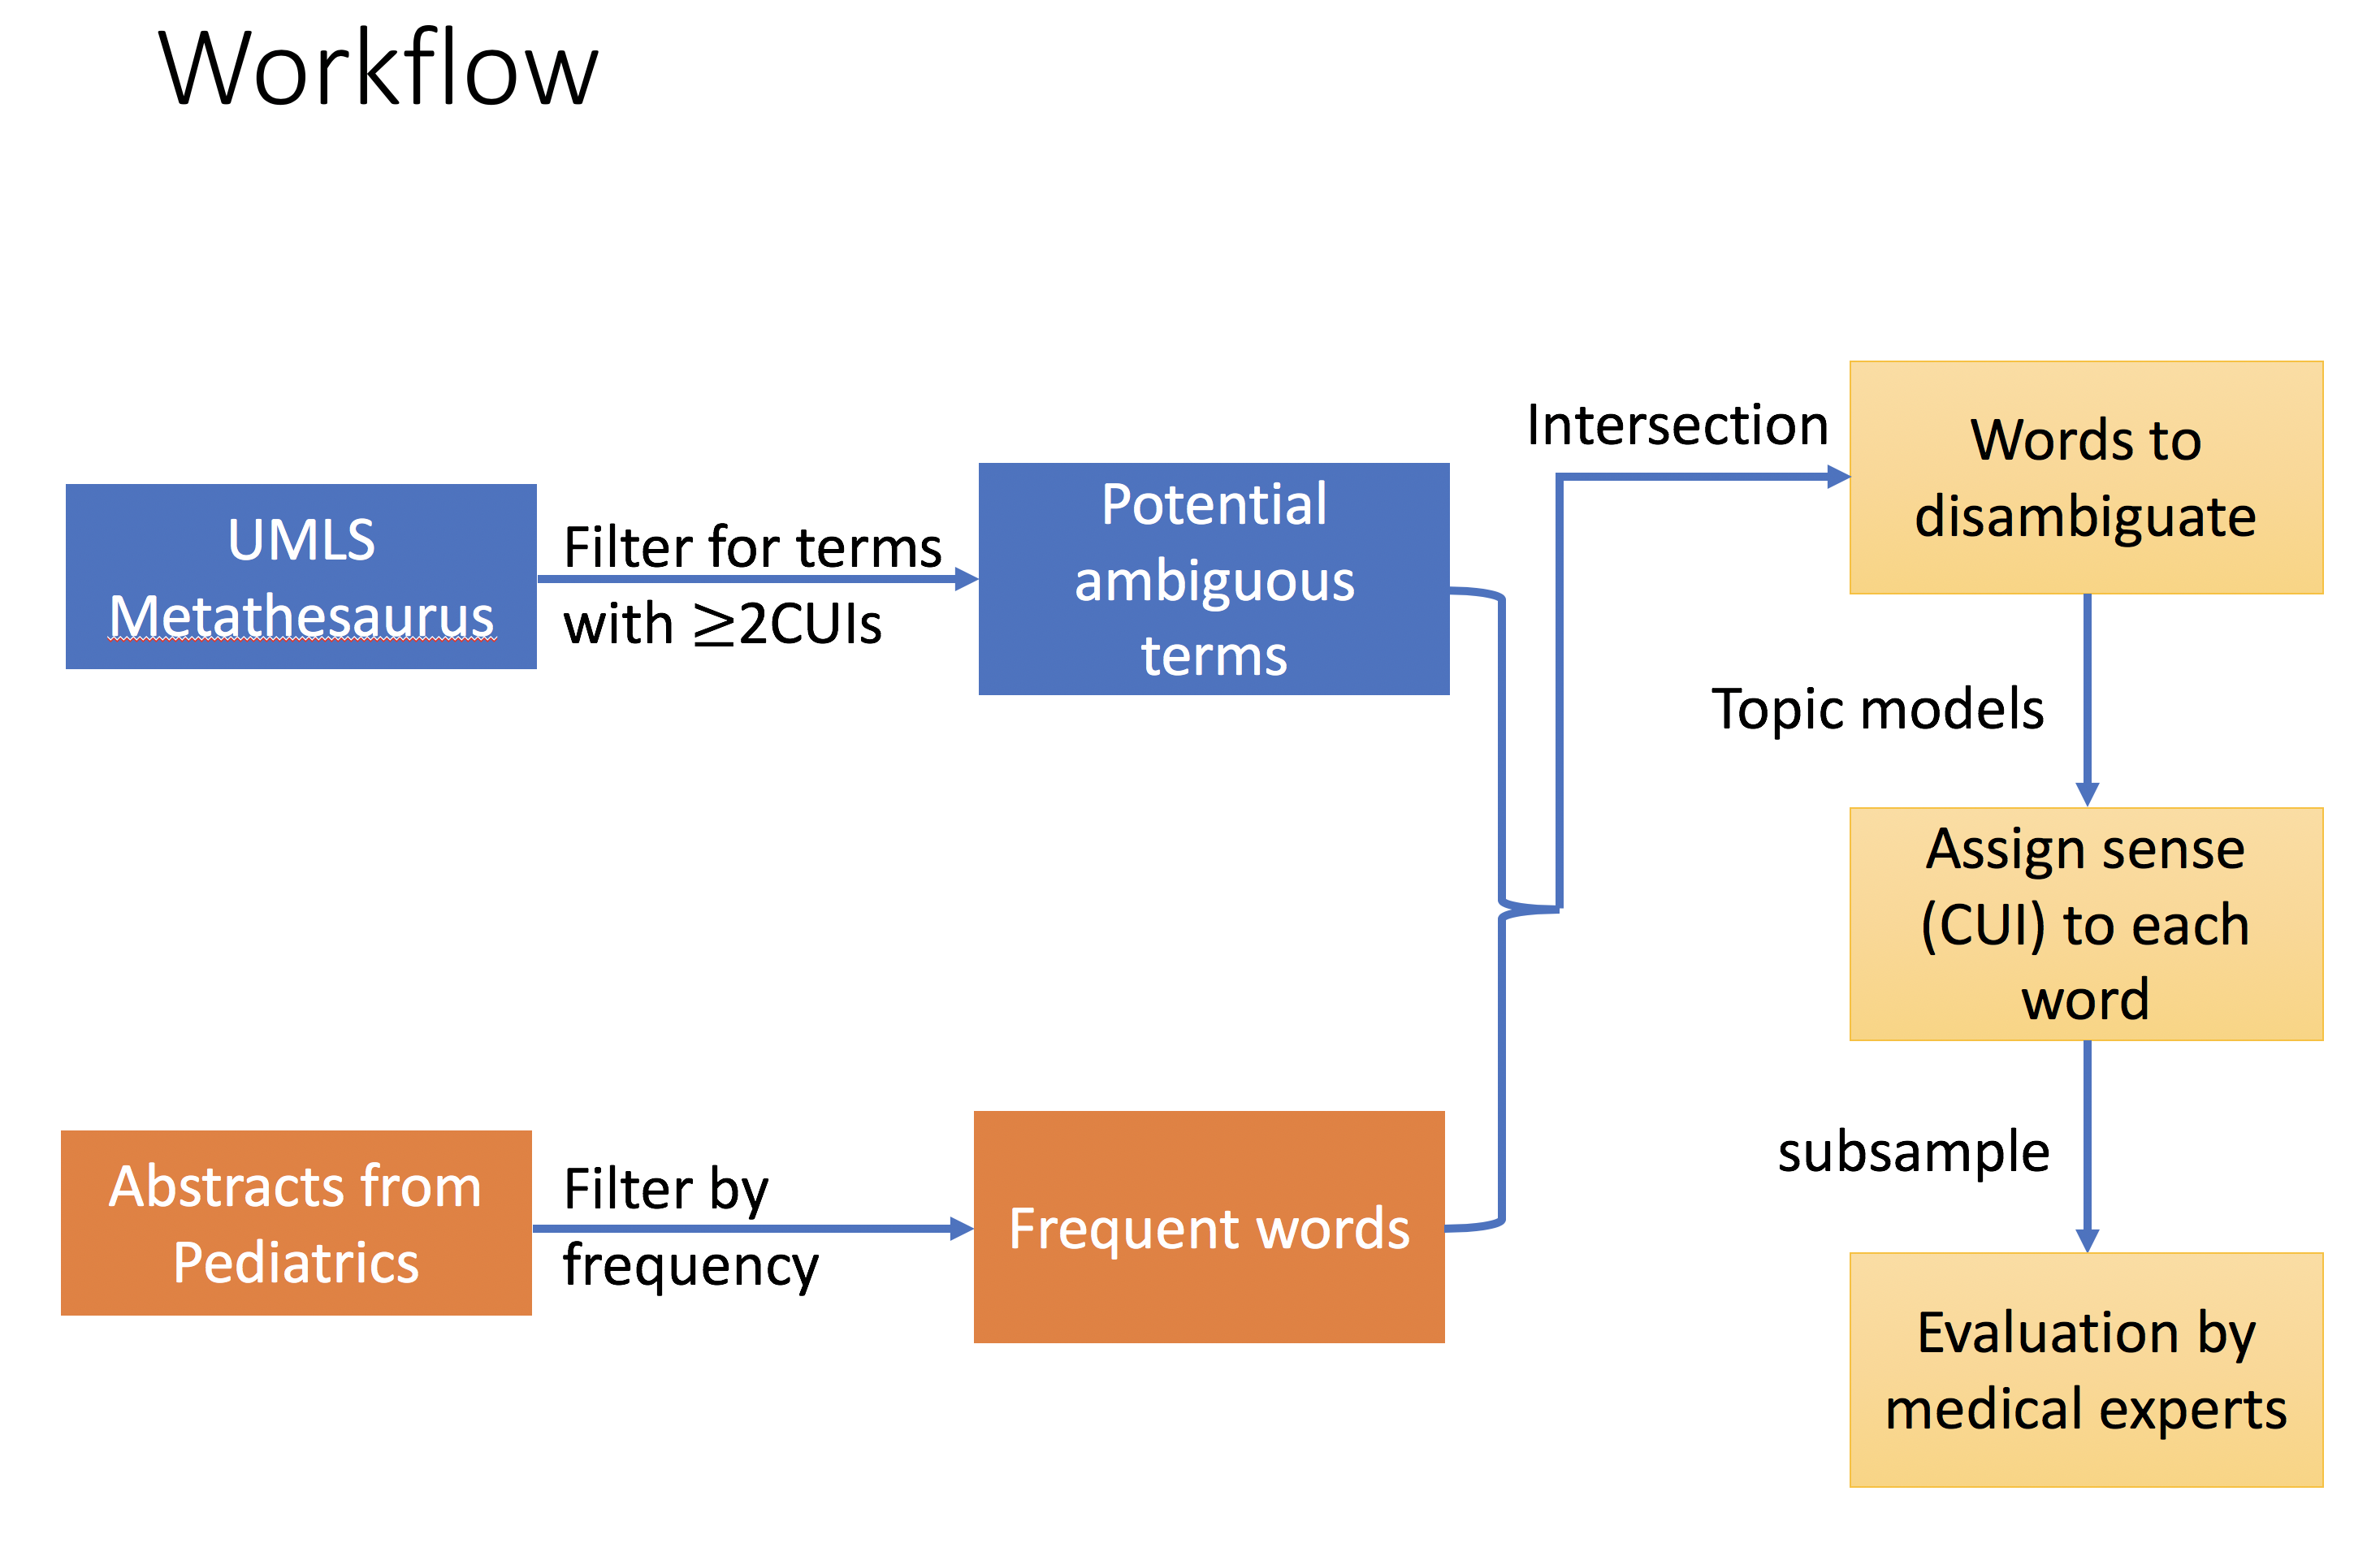

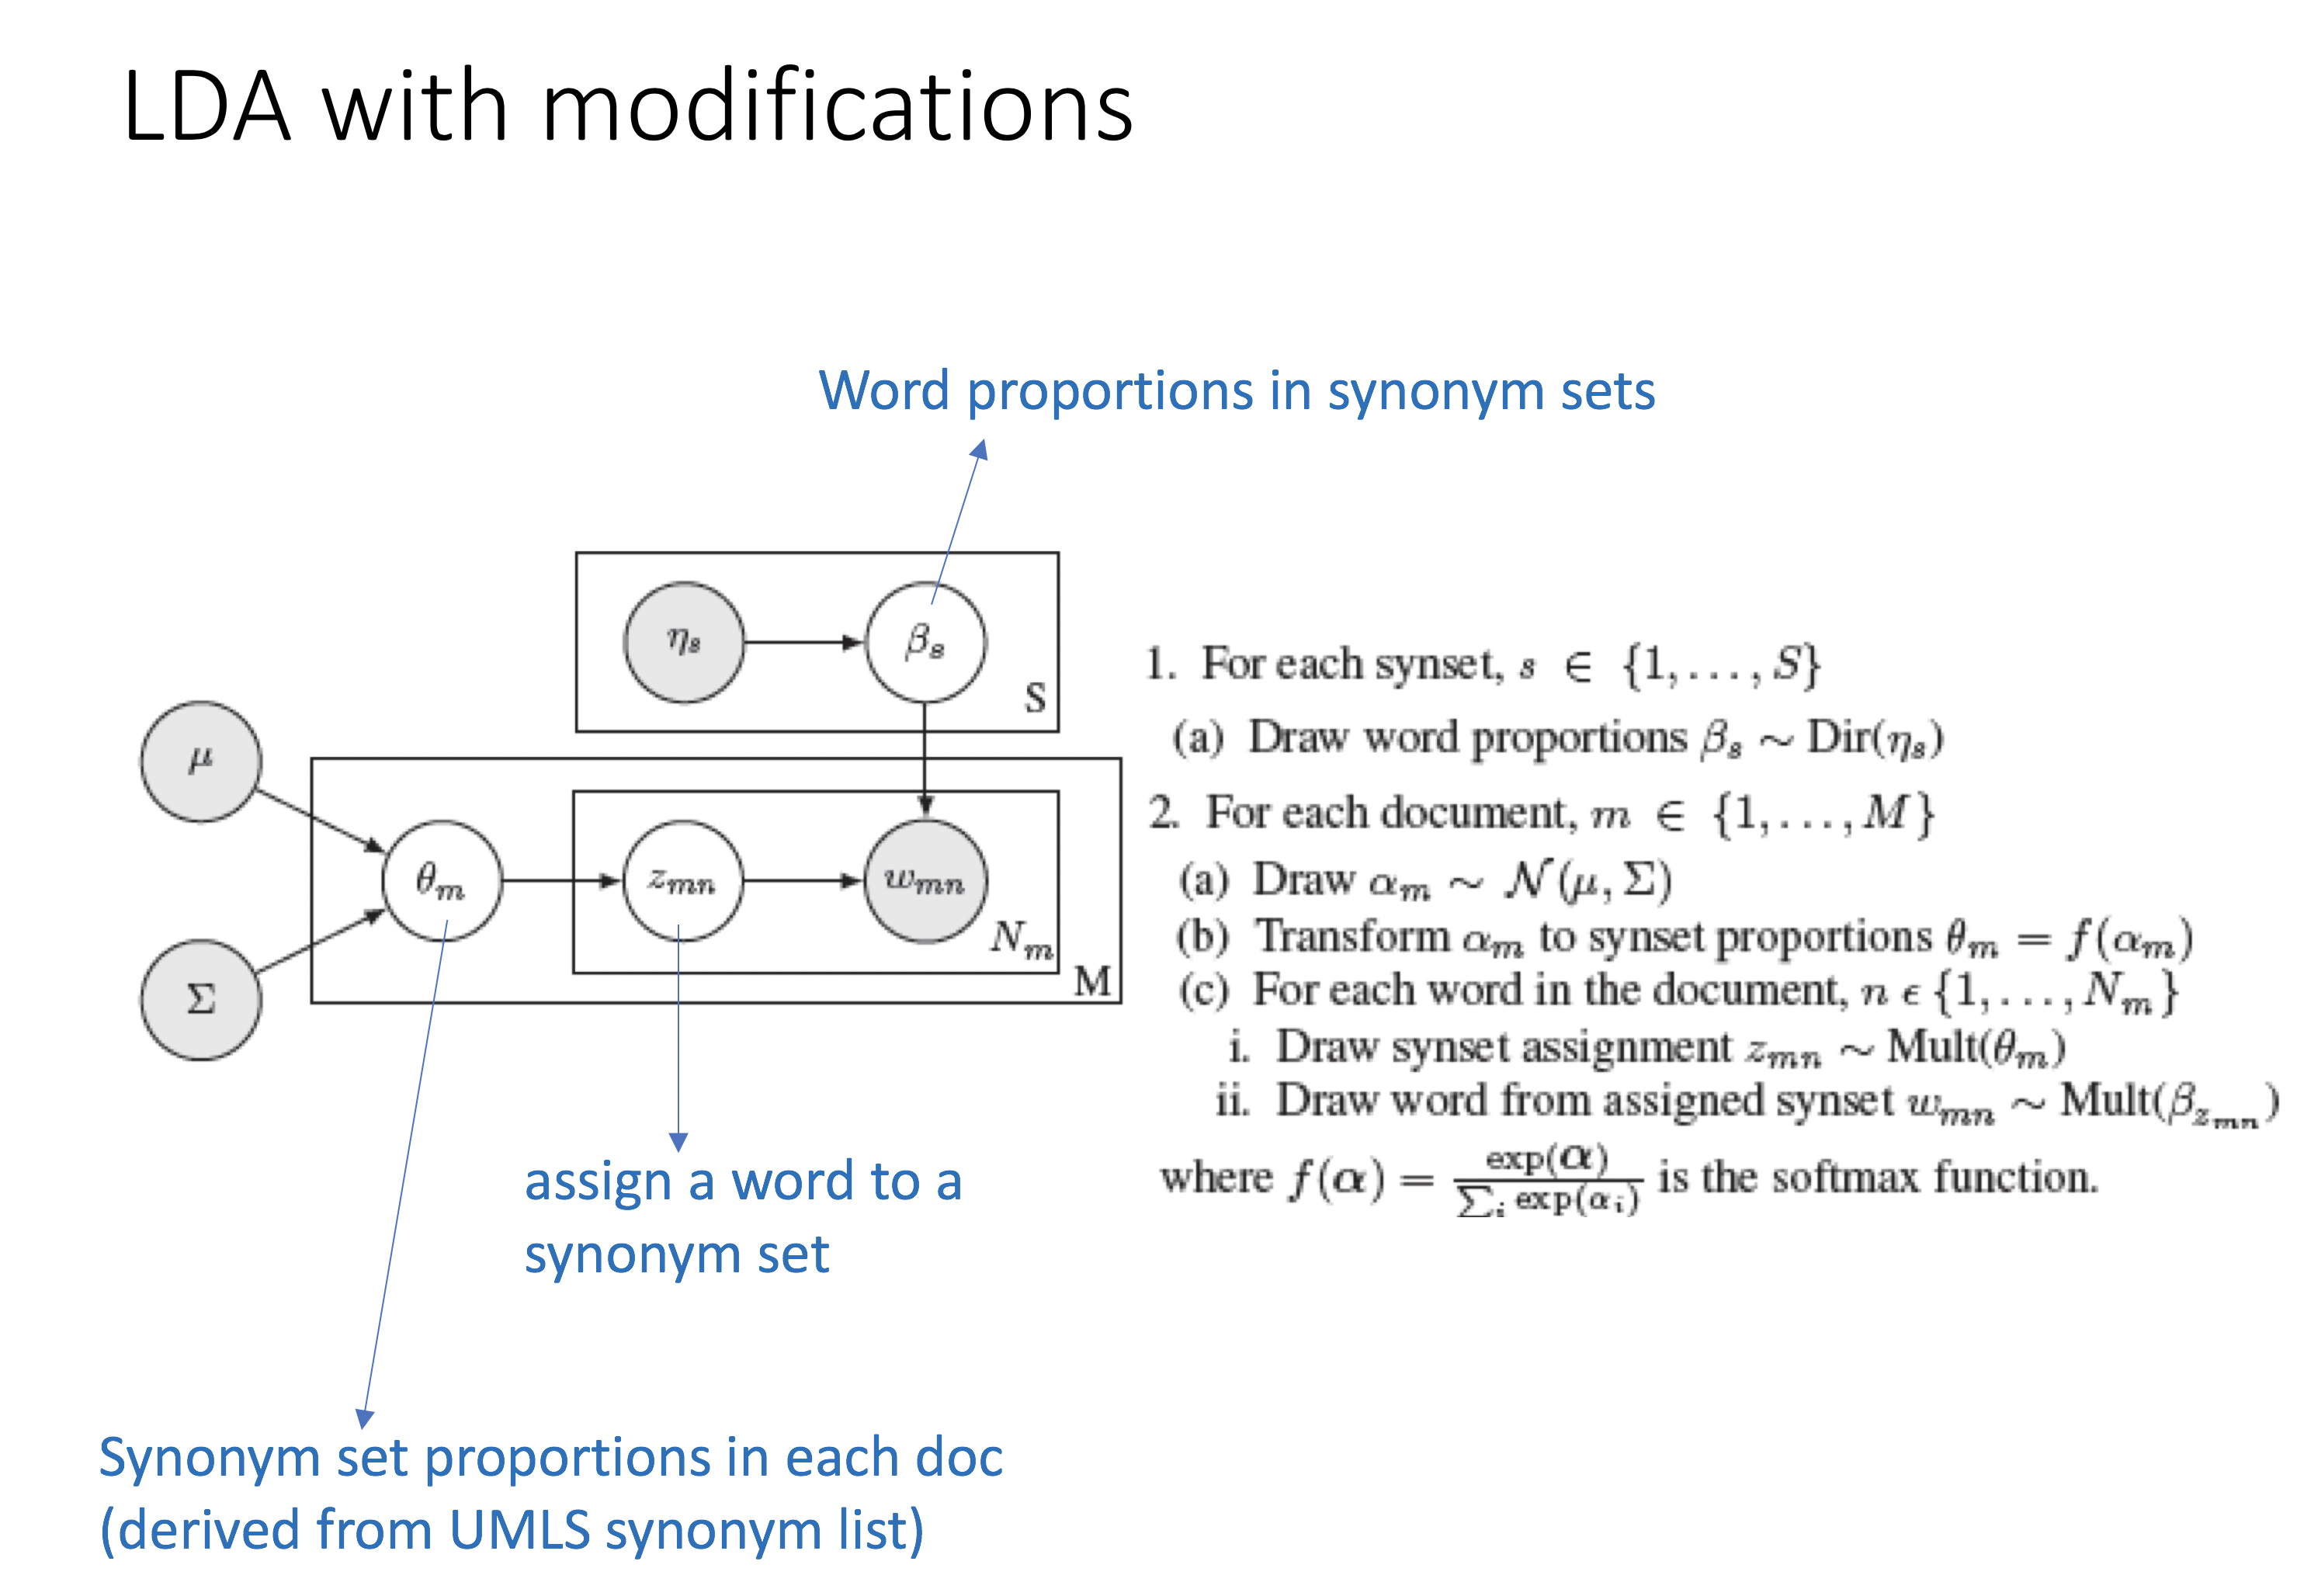

In [57]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src')
import format_dat as FMT
import sklearnLDA_jw as LDA
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing
##### 1. remove pucuations
##### 2. remove stop words
##### 3. convert tense

In [4]:
for i, word in enumerate(FMT.stop_words):
    print(word, end="  ")
    if i % 10 == 0 and i != 0:
        print()

and  will  should've  into  re  under  hadn  hasn  aren't  they  did  
again  d  ve  mightn  on  whom  over  from  the  ourselves  
who  were  in  such  just  yourself  up  couldn  don't  ours  
had  s  needn  wasn  to  both  between  off  my  now  
a  nor  before  only  very  weren't  more  won't  isn  doesn  
couldn't  shan  at  as  about  why  you've  but  then  our  
any  other  your  where  if  own  him  some  those  shouldn  
through  ll  are  few  most  too  here  myself  wasn't  that'll  
didn't  because  you  you'd  hasn't  these  y  she's  it  out  
mustn't  their  do  having  m  o  t  of  mustn  her  
haven  with  be  won  each  yourselves  me  an  was  she  
which  should  down  have  you're  ma  what  his  when  or  
does  during  am  once  i  shouldn't  theirs  wouldn't  no  doing  
wouldn  you'll  there  can  so  than  hers  themselves  mightn't  himself  
doesn't  by  below  same  isn't  until  for  haven't  above  shan't  
not  this  don  has  how  it's  weren  hadn't 

In [58]:
word = "cold"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

Error 20572396 ['analysis', 'change', 'population', 'purpose', 'research', 'using', 'quantitative', 'method', 'population', 'tissue', 'rat', 'help', 'complex', 'used', 'general', 'decrease', 'cell', 'detected', 'change', 'cell', 'population', 'day', '14', '21', 'found', 'day', '30', 'cell', 'day', '45', 'increase', 'number', 'found']
Error 20568385 ['efficacy', 'second', 'treatment', 'analysis', 'background', 'form', 'physical', 'ha', 'treated', 'first', 'data', 'regarding', 'second', 'treatment', 'objective', 'review', 'determine', 'efficacy', 'second', 'treatment', 'method', 'data', 'via', 'search', 'may', 'included', 'double', 'blind', 'randomized', 'placebo', 'controlled', 'treatment', 'patient', 'second', 'medication', 'v', 'placebo', 'patient', 'identified', '4', 'included', 'two', 'trial', 'indicated', 'second', 'significantly', 'presence', 'treatment', 'v', 'placebo', 'ratio', '8', '95', 'confidence', '4', '18', '13', 'two', 'trial', 'demonstrated', 'reduction', 'area', 'treatm

In [59]:
pkl = FMT.pickle.load(open("../output/cold_MSH/dict.pkl", "rb"))
data = LDA.np.load("../output/cold_MSH/train.npy", allow_pickle=True, encoding="bytes")
data = LDA.np.array([list(word) for word in data], dtype=np.float32)
print(data)

[]


In [60]:
for i, (k,v) in enumerate(pkl.items()):
    print("<{}><{}><{}>".format(k, v, ins.WC[k]), end="  ")
    if i % 5 == 0 and i != 0:
        print()

<analysis><0><48>  <change><1><51>  <population><2><22>  <purpose><3><15>  <research><4><18>  <using><5><40>  
<quantitative><6><11>  <method><7><77>  <tissue><8><18>  <rat><9><12>  <help><10><13>  
<complex><11><13>  <used><12><53>  <general><13><22>  <decrease><14><22>  <cell><15><34>  
<detected><16><11>  <day><17><49>  <14><18><14>  <21><19><16>  <found><20><36>  
<30><21><21>  <45><22><11>  <increase><23><46>  <number><24><23>  <efficacy><25><27>  
<second><26><13>  <treatment><27><61>  <background><28><47>  <form><29><11>  <physical><30><11>  
<ha><31><60>  <treated><32><19>  <first><33><24>  <data><34><49>  <regarding><35><10>  
<objective><36><48>  <review><37><24>  <determine><38><24>  <via><39><10>  <search><40><10>  
<may><41><65>  <included><42><28>  <double><43><13>  <blind><44><10>  <randomized><45><17>  
<placebo><46><21>  <controlled><47><28>  <patient><48><74>  <medication><49><34>  <v><50><11>  
<identified><51><26>  <4><52><48>  <two><53><52>  <trial><54><29>  <indic

In [61]:
word="cold"; num_topics=3; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

(0,)


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Word Cloud For Each Word Sense

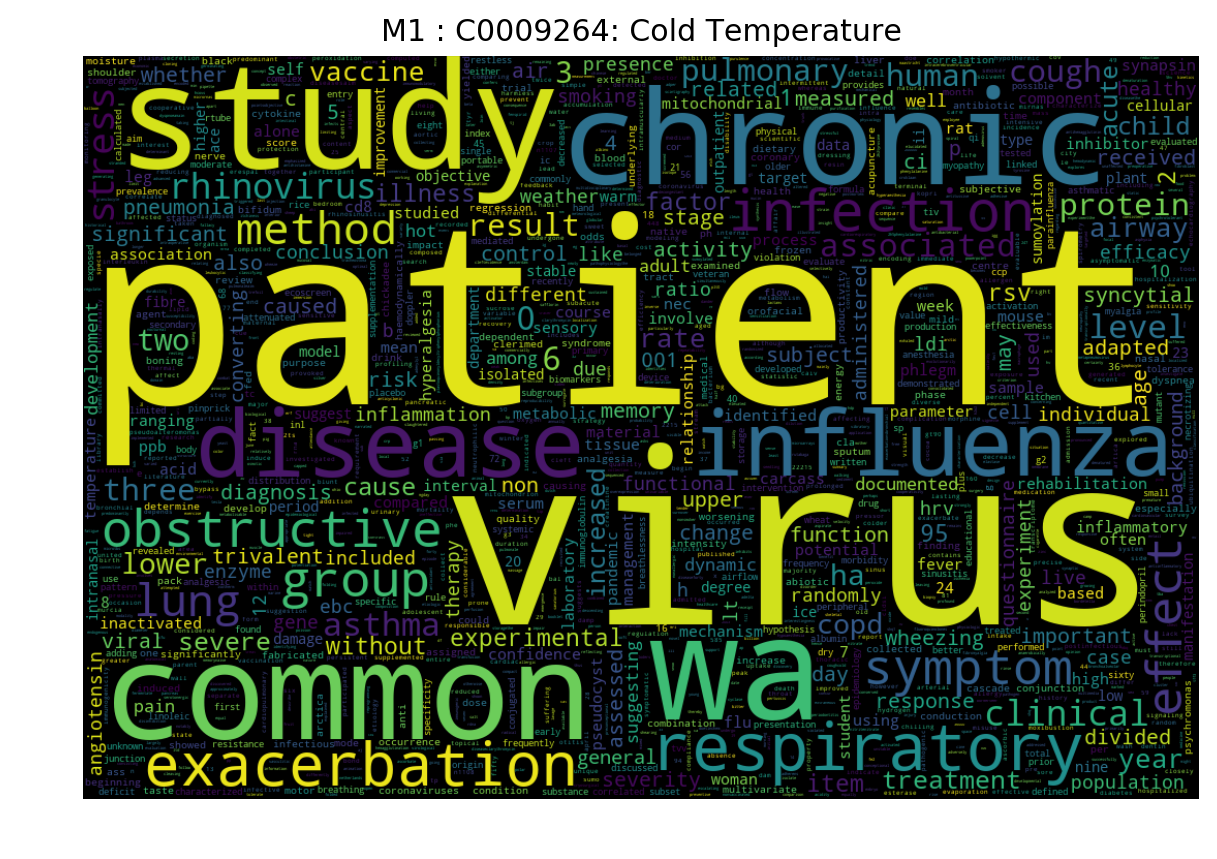

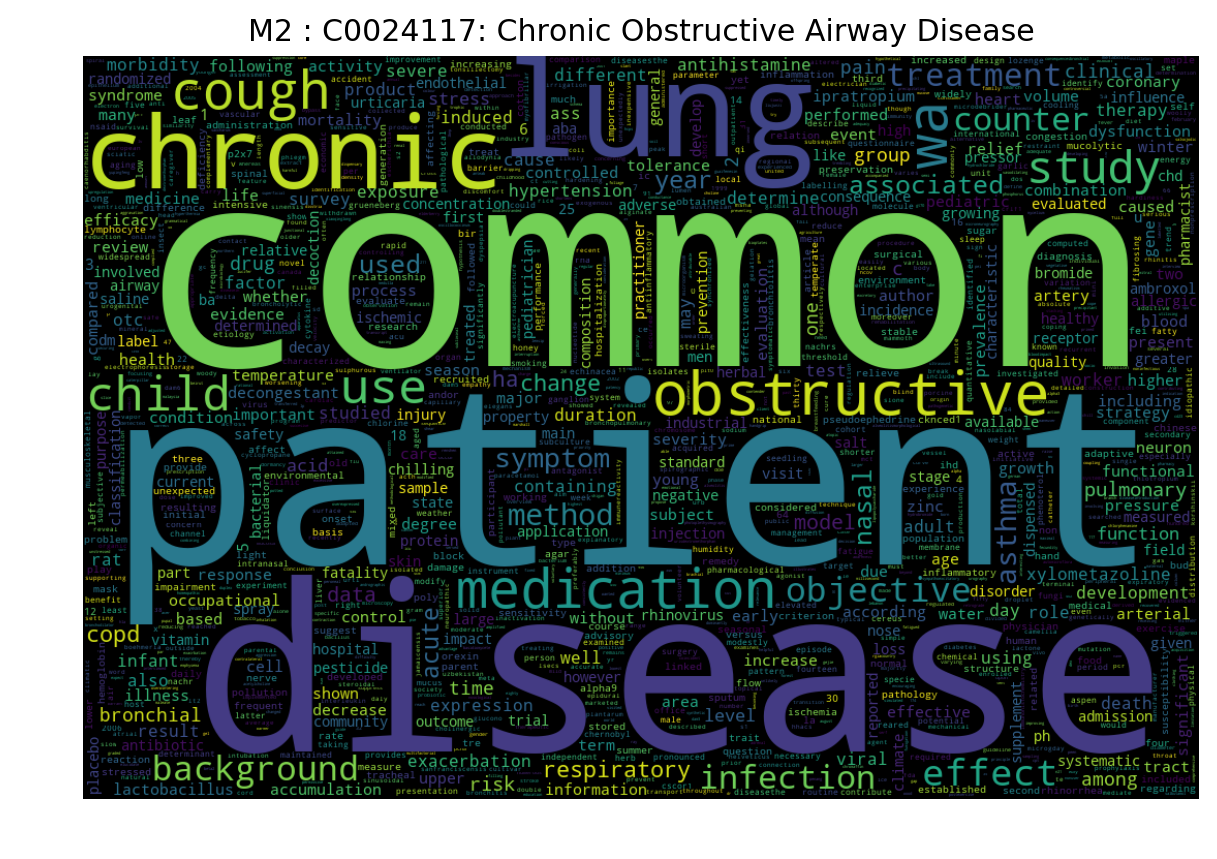

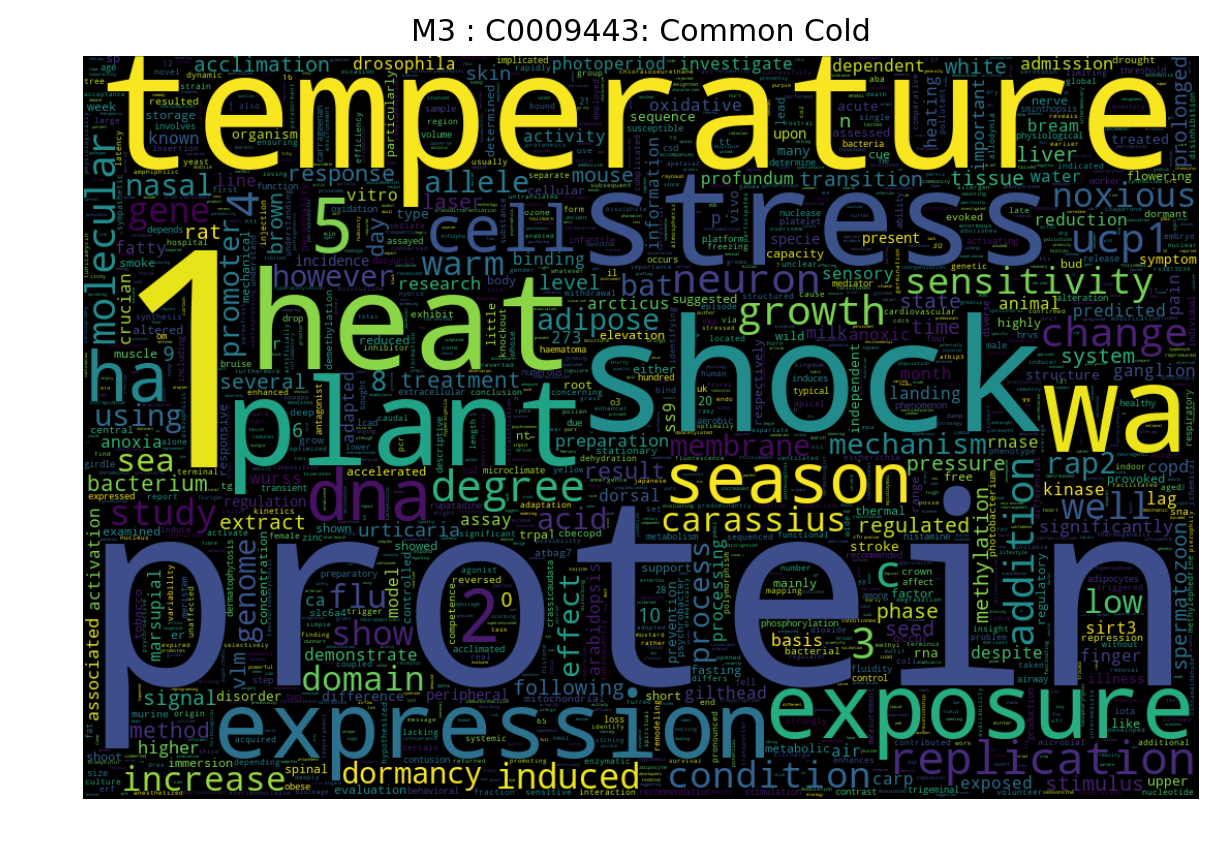

In [45]:
Senses = ["C0009264: Cold Temperature", "C0024117: Chronic Obstructive Airway Disease", "C0009443: Common Cold"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

In [38]:
word = "ventricle"
n_of_nearby_word = 30
source = "MSH"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [39]:
word="ventricle"; num_topics=2; source="MSH"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word)

(198, 428)
Topic 0: ['ventricle', 'brain', 'ventricular', 'patient', 'model', 'study', 'cell', 'volume', 'method', '1', 'result', '3', 'lateral', 'cerebral', 'mri', 'fluid', 'system', 'normal', 'using', 'image', 'mouse', 'hydrocephalus', 'csf', 'flow', 'imaging', 'case', 'year', '2', 'adult']
Topic 1: ['ventricle', 'left', 'ventricular', 'heart', 'right', 'cardiac', 'function', 'expression', 'myocardial', 'study', 'change', 'lv', 'rat', 'gene', 'effect', 'group', 'result', 'significant', 'patient', 'protein', '0', 'increased', 'level', 'wall', 'channel', 'cell', 'rv', 'n', 'compared']
Accuracy:  0.8888888888888888


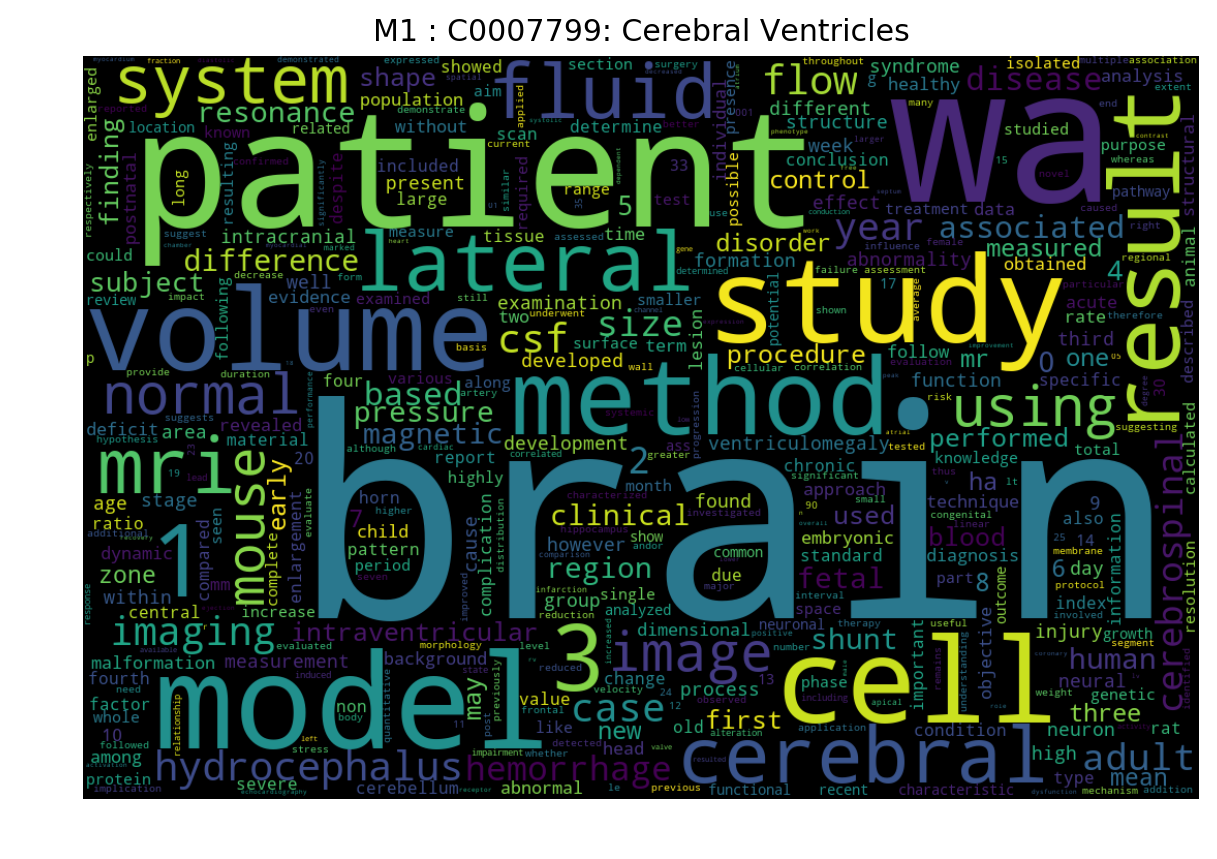

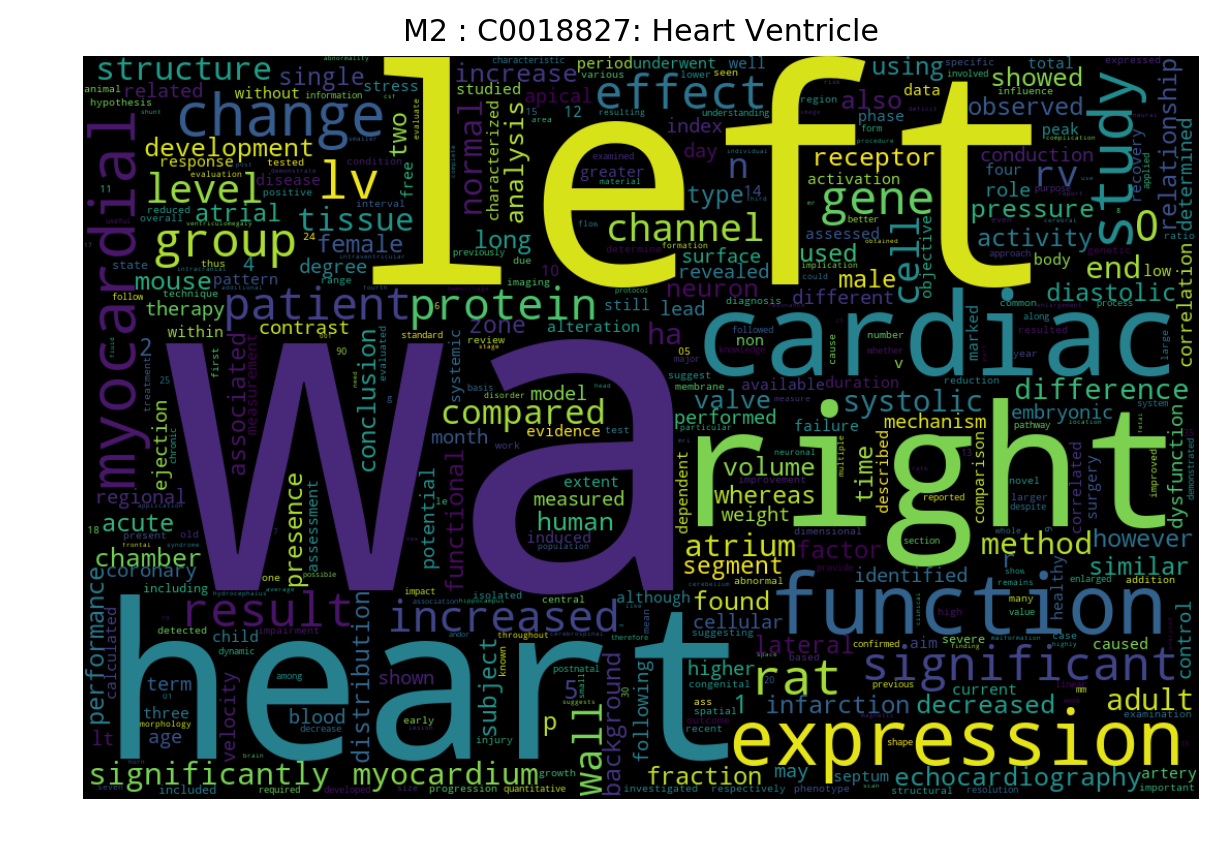

In [40]:
Senses = ["C0007799: Cerebral Ventricles", "C0018827: Heart Ventricle"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

# Perform on Pediatrics

In [14]:
word = "ventricle"
n_of_nearby_word = 10
source = "Ped"
ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)

In [15]:
word="ventricle"; num_topics=2; source="Ped"
res, acc = LDA.run(word, num_topics, source, num_top_words=n_of_nearby_word, verbose=1)

(59, 94)
Topic 0: ['infant', 'ventricle', 'ventricular', '2', 'age', 'left', '1', 'time', 'brain']
Topic 1: ['ventricle', 'patient', 'child', 'right', 'single', 'disease', 'pulmonary', 'cardiac', 'heart']
Accuracy:  0.7288135593220338


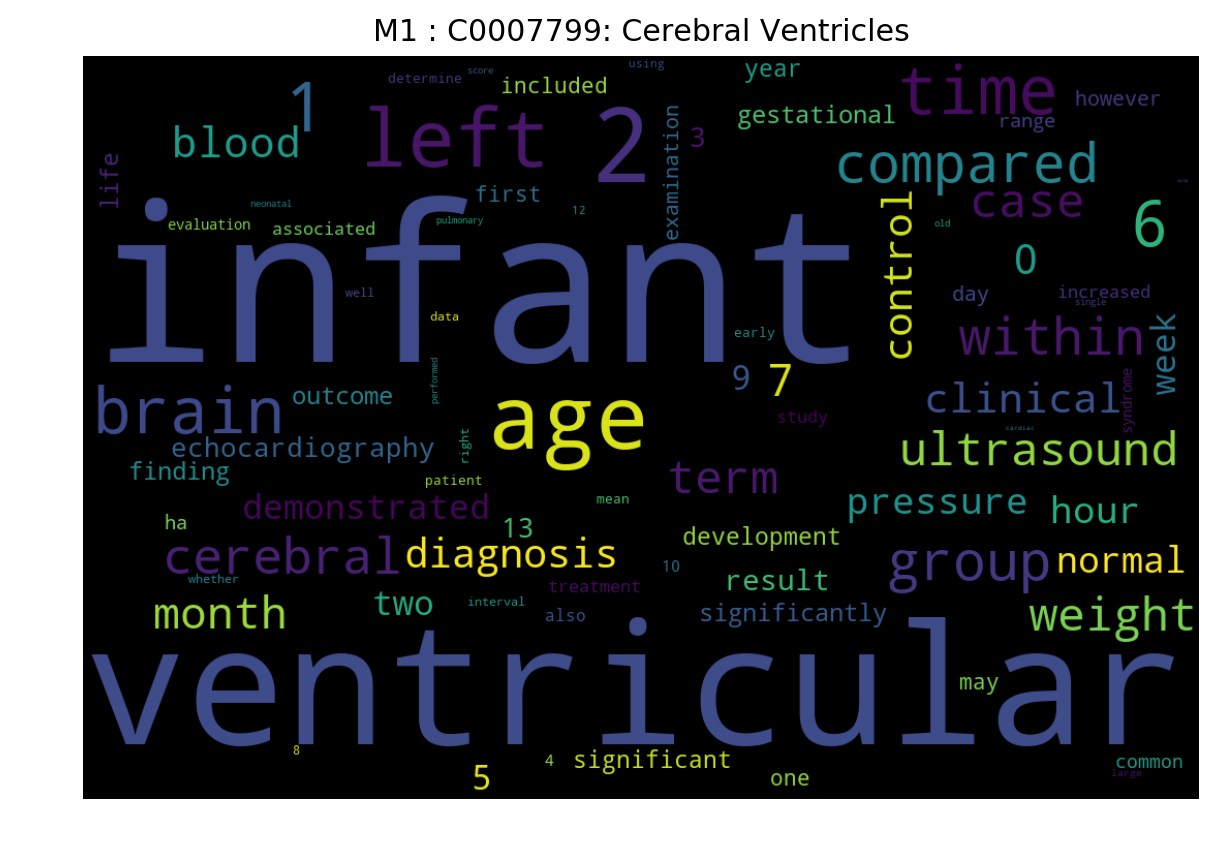

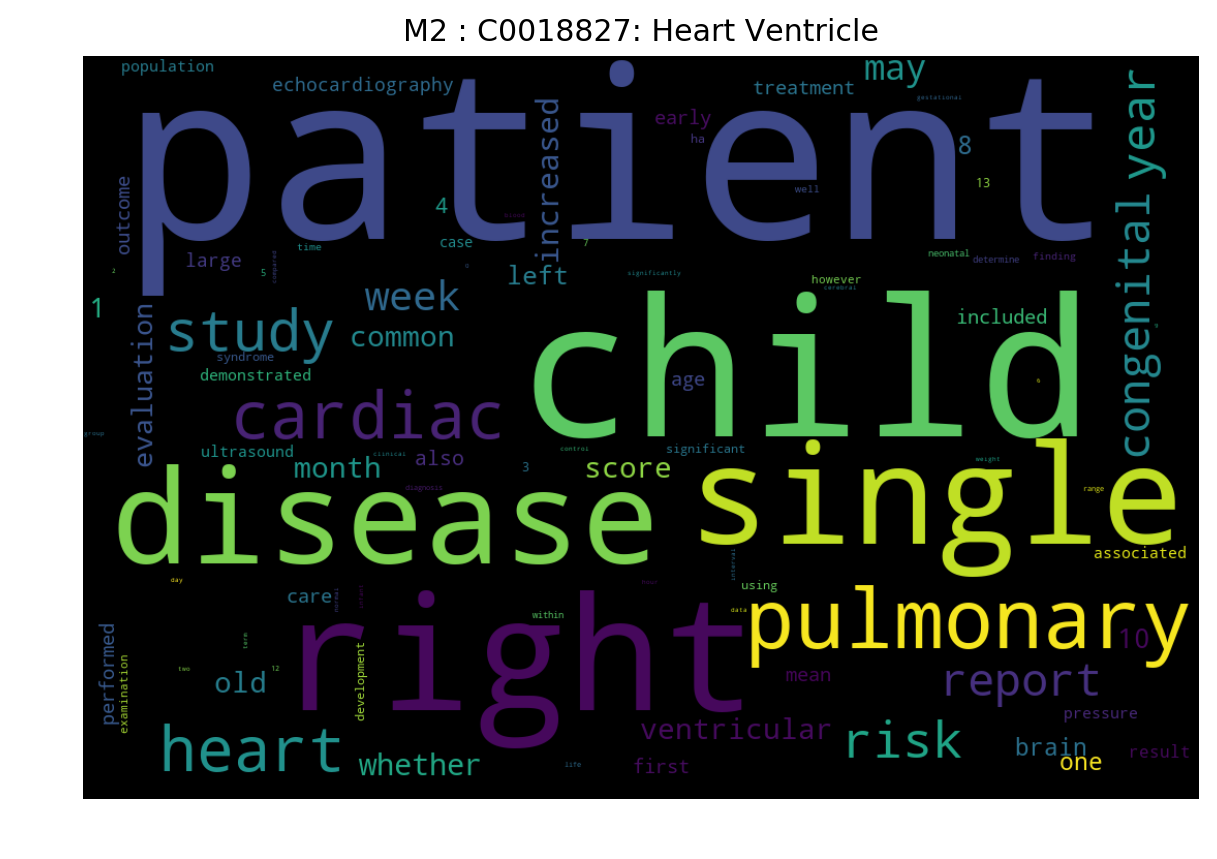

In [16]:
Senses = ["C0007799: Cerebral Ventricles", "C0018827: Heart Ventricle"]
for i, wc in enumerate(res):
    LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
    LDA.plt.imshow(wc, interpolation='bilinear')
    LDA.plt.axis("off")
    LDA.plt.title("M%d : %s"%(i+1, Senses[i]))
    LDA.plt.show()

## What's the best window size?

In [28]:
word="cold"; num_topics=3; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)
(260, 461)


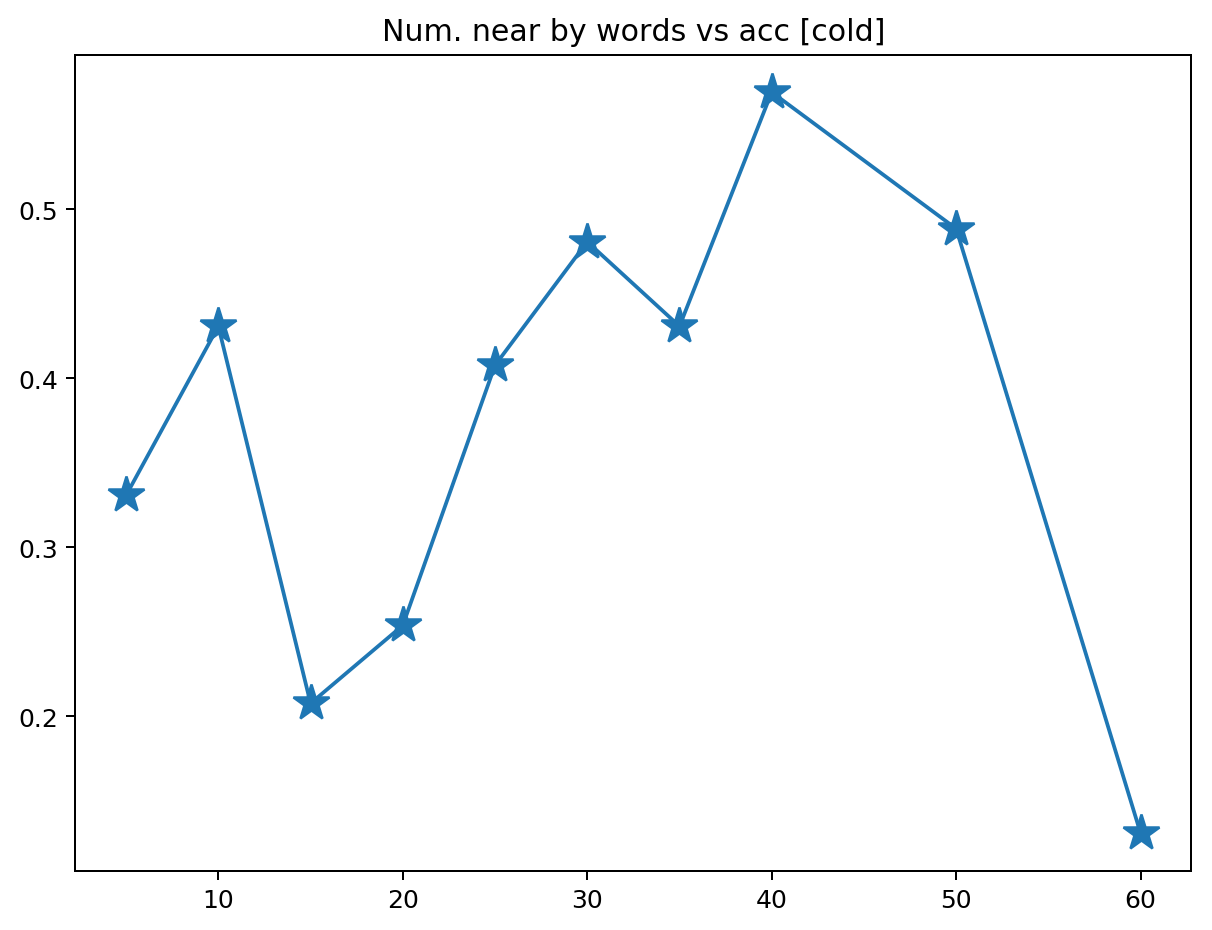

In [29]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [cold]")
LDA.plt.show()

In [19]:
word = "ventricle"; num_topics=2; source="MSH"
accs = []
Nearwords = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
for n_of_nearby_word in Nearwords:
    ins = FMT.DoBagOfWords(word, source, n_of_nearby_word)
    wc, acc = LDA.run(word, num_topics, source, num_top_words = n_of_nearby_word, verbose=0)
    accs.append(acc)

(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)
(198, 428)


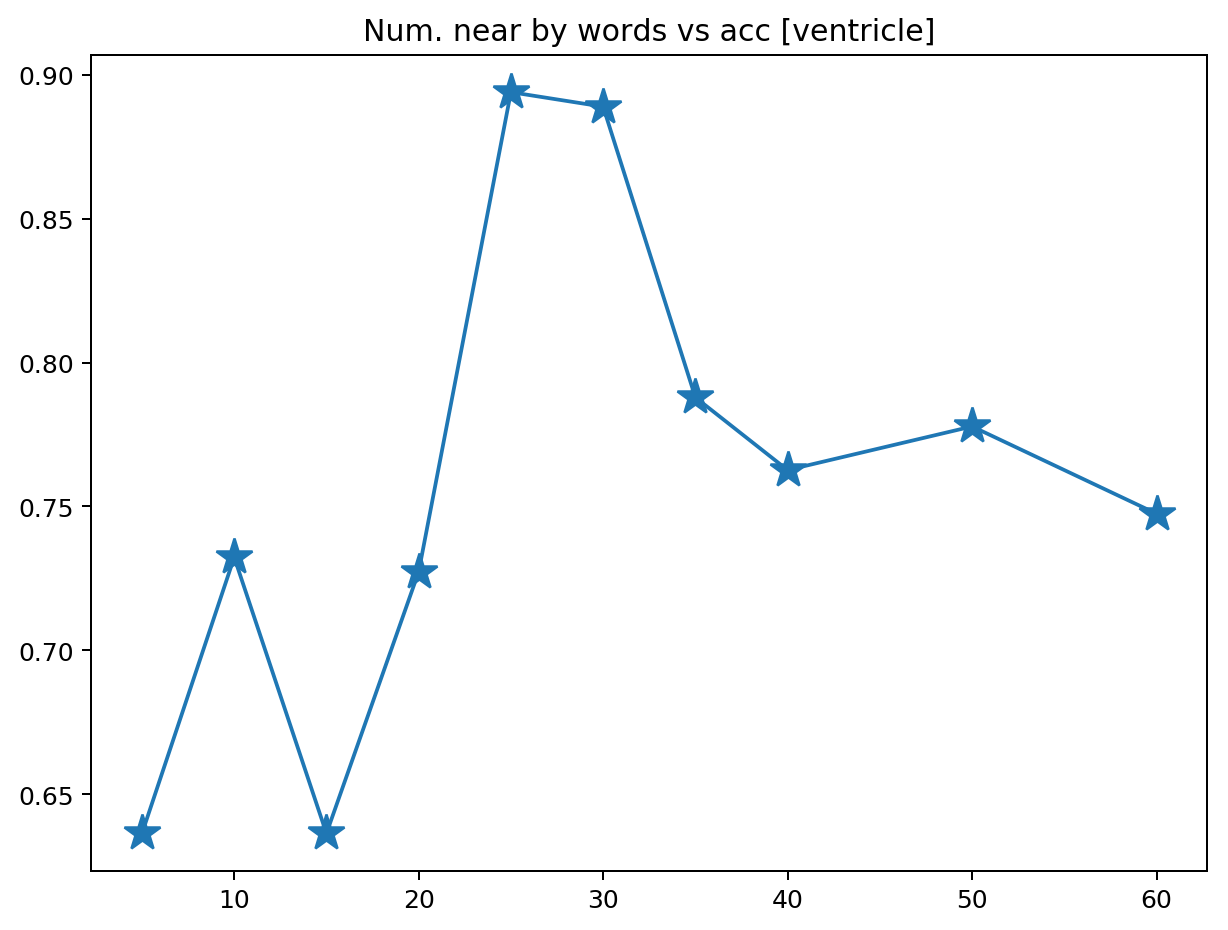

In [20]:
LDA.plt.figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
LDA.plt.plot(Nearwords, accs, marker="*", markersize=15)
LDA.plt.title("Num. near by words vs acc [ventricle]")
LDA.plt.show()

# Compared to other methods

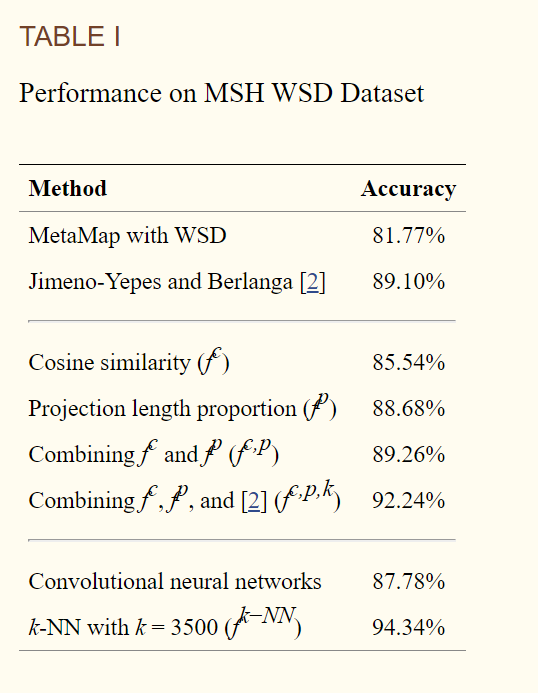

## What we learned
##### 1. Word sense can be represented by its nearby words
##### 2. Best number of nearby words differ with different words, could have relationship with number of senses it has.

## What needs to be done
##### 1. Use word embeddings to automaticlly match word sense with concept sense.
##### 2. Better preprocessing is needed.
##### 3. Run our model on all ambiguatious words from UMLS with CUIs >= 2.

### Code and Data Avaiable at https://github.com/zhangly811/WordSenseDetection